In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r"C:\Users\stude\Downloads\Crash.csv")

In [4]:
df.head(10)

,Crash_Severity,Vehicle_Speed,Crash_Time,Age,Gender,Vehicle_Type,Number_of_Lanes,Lane_Width,Road_Type,Alcohol_Consumption,Crash_Type,Seatbelt_Usage,Speed_Limit,Road_Surface_Condition
0,Minor injury,107,11,27,Male,Heavy Vehicle,2,3.484386,Urban,Yes,Rear-end,No,30,Icy
1,Minor injury,27,16,39,Male,Car,2,3.293091,Rural,Yes,Rear-end,Yes,110,Dry
2,Minor injury,87,14,42,Female,Car,3,3.218911,Urban,No,Rear-end,No,59,Dry
3,Minor injury,43,3,60,Female,Heavy Vehicle,2,3.113012,Rural,No,Rear-end,No,73,Wet
4,Minor injury,72,8,70,Male,T.W,3,3.106580,Urban,Yes,Rear-end,Yes,42,Wet
5,Minor injury,15,20,49,Female,Car,3,3.387430,Rural,Yes,Rear-end,Yes,117,Dry
6,Minor injury,62,6,70,Male,Car,1,3.464110,Urban,No,Head-on,Yes,55,Dry
7,Minor injury,96,17,69,Male,Car,2,3.199897,Rural,Yes,Head-on,Yes,117,Icy
8,Minor injury,85,8,40,Female,Car,2,3.333741,Rural,No,Head-on,Yes,97,Icy
9,Minor injury,120,21,18,Female,Car,1,3.113678,Urban,No,Rear-end,No,100,Dry


#one hot encoding

In [5]:
df1 = pd.concat(
    [
        df,
        pd.get_dummies(df["Gender"], prefix="Gender",drop_first=True),
        pd.get_dummies(df["Road_Type"], prefix="Road_Type",drop_first=True),
        pd.get_dummies(df["Vehicle_Type"], prefix="Vehicle_Type",drop_first=True),
        pd.get_dummies(df["Crash_Type"], prefix="Crash_Type",drop_first=True),
        pd.get_dummies(df["Seatbelt_Usage"], prefix="Seatbelt",drop_first=True),
        pd.get_dummies(df["Road_Surface_Condition"], prefix="Road_Surface",drop_first=True),
        pd.get_dummies(df["Alcohol_Consumption"], prefix="Alcohol_Consumption",drop_first=True),

    ],
    axis=1,
)


In [6]:
df1

,Crash_Severity,Vehicle_Speed,Crash_Time,Age,Gender,Vehicle_Type,Number_of_Lanes,Lane_Width,Road_Type,Alcohol_Consumption,...,Road_Surface_Condition,Gender_Male,Road_Type_Urban,Vehicle_Type_Heavy Vehicle,Vehicle_Type_T.W,Crash_Type_Rear-end,Seatbelt_Yes,Road_Surface_Icy,Road_Surface_Wet,Alcohol_Consumption_Yes
0,Minor injury,107,11,27,Male,Heavy Vehicle,2,3.484386,Urban,Yes,...,Icy,True,True,True,False,True,False,True,False,True
1,Minor injury,27,16,39,Male,Car,2,3.293091,Rural,Yes,...,Dry,True,False,False,False,True,True,False,False,True
2,Minor injury,87,14,42,Female,Car,3,3.218911,Urban,No,...,Dry,False,True,False,False,True,False,False,False,False
3,Minor injury,43,3,60,Female,Heavy Vehicle,2,3.113012,Rural,No,...,Wet,False,False,True,False,True,False,False,True,False
4,Minor injury,72,8,70,Male,T.W,3,3.106580,Urban,Yes,...,Wet,True,True,False,True,True,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,Fatal crash,112,4,30,Male,Car,1,3.248476,Urban,No,...,Icy,True,True,False,False,False,False,True,False,False
296,Fatal crash,87,21,52,Female,Heavy Vehicle,2,3.037739,Urban,Yes,...,Icy,False,True,True,False,True,False,True,False,True
297,Fatal crash,85,20,79,Female,Heavy Vehicle,2,3.350668,Rural,Yes,...,Wet,False,False,True,False,True,False,False,True,True
298,Fatal crash,44,5,23,Female,Car,3,3.419304,Urban,Yes,...,Wet,False,True,False,False,True,True,False,True,True


In [7]:
df1.drop(
    ["Gender", "Road_Type", "Vehicle_Type", "Crash_Type", "Seatbelt_Usage", "Road_Surface_Condition","Alcohol_Consumption"],
    axis=1,
    inplace=True,
)

In [8]:
df1["Crash_Severity"].unique()

array(['Minor injury', 'Major injury', 'Fatal crash'], dtype=object)

In [9]:
from sklearn.preprocessing import LabelEncoder

# Create a custom ordering for the severity levels
severity_order = [ "Fatal crash", "Major injury","Minor injury"]

# Use pandas' Categorical to enforce this order
df1["Crash_Severity"] = pd.Categorical(df1["Crash_Severity"], categories=severity_order, ordered=True)

# Apply LabelEncoder
le = LabelEncoder()
df1['Labelled_Severity'] = le.fit_transform(df1["Crash_Severity"])

# Verify the mapping
print(dict(zip(le.classes_, le.transform(le.classes_))))  # To see the mapping
df1.head()


{'Fatal crash': 0, 'Major injury': 1, 'Minor injury': 2}


,Crash_Severity,Vehicle_Speed,Crash_Time,Age,Number_of_Lanes,Lane_Width,Speed_Limit,Gender_Male,Road_Type_Urban,Vehicle_Type_Heavy Vehicle,Vehicle_Type_T.W,Crash_Type_Rear-end,Seatbelt_Yes,Road_Surface_Icy,Road_Surface_Wet,Alcohol_Consumption_Yes,Labelled_Severity
0,Minor injury,107,11,27,2,3.484386,30,True,True,True,False,True,False,True,False,True,2
1,Minor injury,27,16,39,2,3.293091,110,True,False,False,False,True,True,False,False,True,2
2,Minor injury,87,14,42,3,3.218911,59,False,True,False,False,True,False,False,False,False,2
3,Minor injury,43,3,60,2,3.113012,73,False,False,True,False,True,False,False,True,False,2
4,Minor injury,72,8,70,3,3.106580,42,True,True,False,True,True,True,False,True,True,2


In [10]:
df1.drop("Crash_Severity",axis=1,inplace=True)
df1.head()

,Vehicle_Speed,Crash_Time,Age,Number_of_Lanes,Lane_Width,Speed_Limit,Gender_Male,Road_Type_Urban,Vehicle_Type_Heavy Vehicle,Vehicle_Type_T.W,Crash_Type_Rear-end,Seatbelt_Yes,Road_Surface_Icy,Road_Surface_Wet,Alcohol_Consumption_Yes,Labelled_Severity
0,107,11,27,2,3.484386,30,True,True,True,False,True,False,True,False,True,2
1,27,16,39,2,3.293091,110,True,False,False,False,True,True,False,False,True,2
2,87,14,42,3,3.218911,59,False,True,False,False,True,False,False,False,False,2
3,43,3,60,2,3.113012,73,False,False,True,False,True,False,False,True,False,2
4,72,8,70,3,3.106580,42,True,True,False,True,True,True,False,True,True,2


In [11]:
correlation = df1.corr()  # Compute the correlation matrix
crash_severity_corr = correlation["Labelled_Severity"].sort_values(ascending=False)
correlation["Labelled_Severity"]

Vehicle_Speed                -0.074486
Crash_Time                    0.092824
Age                          -0.018858
Number_of_Lanes              -0.009901
Lane_Width                    0.027923
Speed_Limit                  -0.018271
Gender_Male                   0.016333
Road_Type_Urban               0.016339
Vehicle_Type_Heavy Vehicle   -0.025678
Vehicle_Type_T.W             -0.143468
Crash_Type_Rear-end           0.049007
Seatbelt_Yes                 -0.024522
Road_Surface_Icy             -0.061262
Road_Surface_Wet             -0.016912
Alcohol_Consumption_Yes       0.065372
Labelled_Severity             1.000000
Name: Labelled_Severity, dtype: float64

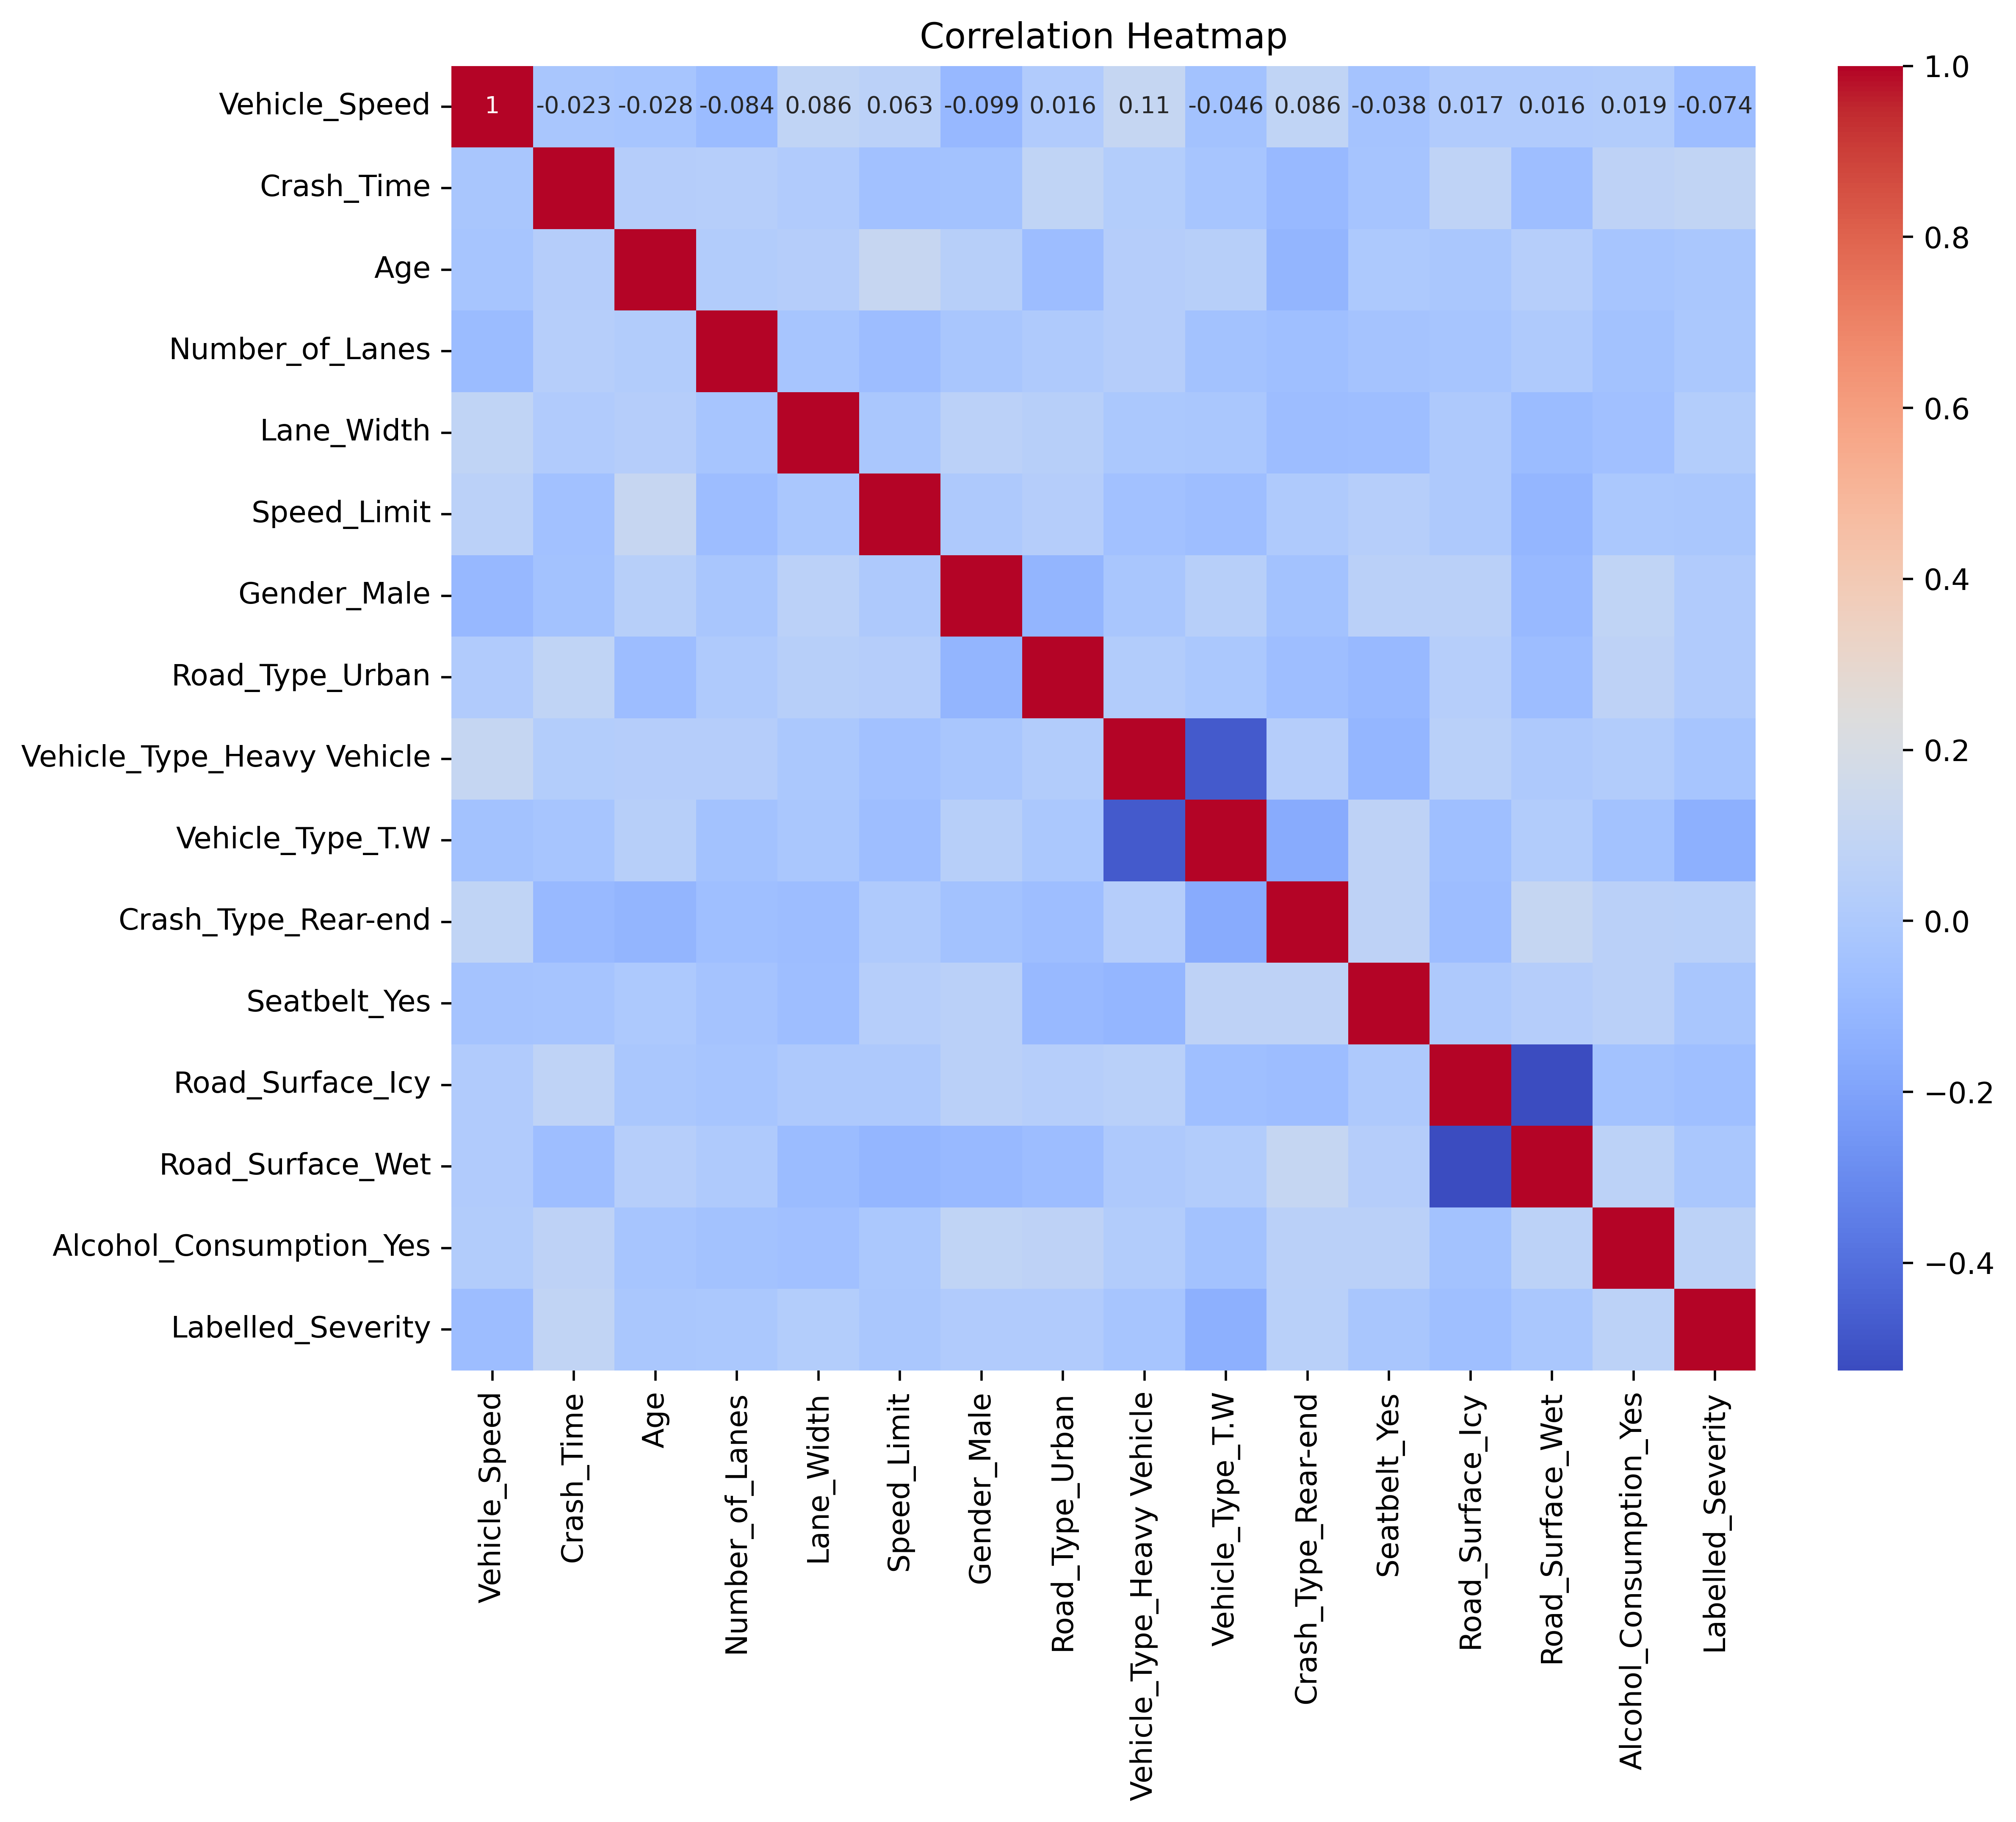

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8),dpi=500)
sns.heatmap(correlation, annot=True,annot_kws={"size":8}, cmap="coolwarm", cbar=True,square=True)
plt.title("Correlation Heatmap")
plt.show()

In [13]:
df1

,Vehicle_Speed,Crash_Time,Age,Number_of_Lanes,Lane_Width,Speed_Limit,Gender_Male,Road_Type_Urban,Vehicle_Type_Heavy Vehicle,Vehicle_Type_T.W,Crash_Type_Rear-end,Seatbelt_Yes,Road_Surface_Icy,Road_Surface_Wet,Alcohol_Consumption_Yes,Labelled_Severity
0,107,11,27,2,3.484386,30,True,True,True,False,True,False,True,False,True,2
1,27,16,39,2,3.293091,110,True,False,False,False,True,True,False,False,True,2
2,87,14,42,3,3.218911,59,False,True,False,False,True,False,False,False,False,2
3,43,3,60,2,3.113012,73,False,False,True,False,True,False,False,True,False,2
4,72,8,70,3,3.106580,42,True,True,False,True,True,True,False,True,True,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,112,4,30,1,3.248476,118,True,True,False,False,False,False,True,False,False,0
296,87,21,52,2,3.037739,38,False,True,True,False,True,False,True,False,True,0
297,85,20,79,2,3.350668,80,False,False,True,False,True,False,False,True,True,0
298,44,5,23,3,3.419304,47,False,True,False,False,True,True,False,True,True,0


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.linear_model import LogisticRegression

# 1. Separate the continuous and categorical features
continuous_features = ['Vehicle_Speed', 'Crash_Time', 'Age', 'Number_of_Lanes', 'Lane_Width', 'Speed_Limit']
categorical_features = ['Gender_Male', 'Road_Type_Urban', 'Vehicle_Type_Heavy Vehicle',
                        'Vehicle_Type_T.W', 'Crash_Type_Rear-end', 'Seatbelt_Yes',
                        'Road_Surface_Icy', 'Road_Surface_Wet', 'Alcohol_Consumption_Yes']

# 2. Separate the target variable (Labelled_Severity)
X = df1[continuous_features + categorical_features]
y = df1['Labelled_Severity']

# 3. Split the data into training (85%) and temporary (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Split the temporary set into validation (7.5%) and test (7.5%) sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)


# 4. Scale the continuous features
scaler = StandardScaler()  # You can use MinMaxScaler() if you want normalization instead of standardization

# Fit the scaler on the training data and transform the continuous features
X_train_scaled = X_train[continuous_features].copy()
X_train_scaled = scaler.fit_transform(X_train_scaled)

# Apply the same transformation on validation and test sets (using the already fitted scaler)
X_val_scaled = X_val[continuous_features].copy()
X_val_scaled = scaler.transform(X_val_scaled)

X_test_scaled = X_test[continuous_features].copy()
X_test_scaled = scaler.transform(X_test_scaled)

# 5. Replace the continuous columns with scaled values in the original dataframes
X_train[continuous_features] = X_train_scaled
X_val[continuous_features] = X_val_scaled
X_test[continuous_features] = X_test_scaled

# 6. Train Logistic Regression Classifier
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model.fit(X_train, y_train)

# 7. Make predictions and evaluate Logistic Regression
y_pred_log_reg = log_reg_model.predict(X_val)

# Evaluate Logistic Regression
log_reg_accuracy = accuracy_score(y_val, y_pred_log_reg)
log_reg_f1 = f1_score(y_val, y_pred_log_reg, average='weighted')
log_reg_recall = recall_score(y_val, y_pred_log_reg, average='weighted')
log_reg_precision = precision_score(y_val, y_pred_log_reg, average='weighted')

# Print Logistic Regression Metrics
print("Logistic Regression Metrics:")
print(f"Accuracy: {log_reg_accuracy * 100:.2f}%")
print(f"F1 Score: {log_reg_f1:.2f}")
print(f"Recall: {log_reg_recall:.2f}")
print(f"Precision: {log_reg_precision:.2f}")

# Optionally, you can print out the model's coefficients to understand which features are important
print("\nLogistic Regression Coefficients:")
for feature, coef in zip(continuous_features + categorical_features, log_reg_model.coef_[0]):
    print(f"{feature}: {coef:.4f}")


Logistic Regression Metrics:
Accuracy: 53.33%
F1 Score: 0.54
Recall: 0.53
Precision: 0.55

Logistic Regression Coefficients:
Vehicle_Speed: 0.0101
Crash_Time: -0.1129
Age: -0.1343
Number_of_Lanes: 0.0752
Lane_Width: -0.0943
Speed_Limit: 0.0361
Gender_Male: 0.0454
Road_Type_Urban: -0.0166
Vehicle_Type_Heavy Vehicle: 0.3546
Vehicle_Type_T.W: 0.3420
Crash_Type_Rear-end: -0.0567
Seatbelt_Yes: -0.0038
Road_Surface_Icy: 0.2759
Road_Surface_Wet: 0.2244
Alcohol_Consumption_Yes: -0.2744


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.linear_model import LogisticRegression


continuous_features = ['Vehicle_Speed', 'Crash_Time', 'Age']

categorical_features = ['Vehicle_Type_T.W', 'Crash_Type_Rear-end', 'Alcohol_Consumption_Yes']


# 2. Separate the target variable (Labelled_Severity)
X = df1[continuous_features + categorical_features]
y = df1['Labelled_Severity']

# 3. Split the data into training and temporary sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Split the temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# 4. Scale the continuous features
scaler = StandardScaler()  # You can use MinMaxScaler() if you want normalization instead of standardization

# Fit the scaler on the training data and transform the continuous features
X_train_scaled = X_train[continuous_features].copy()
X_train_scaled = scaler.fit_transform(X_train_scaled)

# Apply the same transformation on validation and test sets (using the already fitted scaler)
X_val_scaled = X_val[continuous_features].copy()
X_val_scaled = scaler.transform(X_val_scaled)

X_test_scaled = X_test[continuous_features].copy()
X_test_scaled = scaler.transform(X_test_scaled)

# 5. Replace the continuous columns with scaled values in the original dataframes
X_train[continuous_features] = X_train_scaled
X_val[continuous_features] = X_val_scaled
X_test[continuous_features] = X_test_scaled

# 6. Train Logistic Regression Classifier
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model.fit(X_train, y_train)

# 7. Make predictions and evaluate Logistic Regression
y_pred_log_reg = log_reg_model.predict(X_val)

# Evaluate Logistic Regression
log_reg_accuracy = accuracy_score(y_val, y_pred_log_reg)
log_reg_f1 = f1_score(y_val, y_pred_log_reg, average='weighted')
log_reg_recall = recall_score(y_val, y_pred_log_reg, average='weighted')
log_reg_precision = precision_score(y_val, y_pred_log_reg, average='weighted')

# Print Logistic Regression Metrics
print("Logistic Regression Metrics:")
print(f"Accuracy: {log_reg_accuracy * 100:.2f}%")
print(f"F1 Score: {log_reg_f1:.2f}")
print(f"Recall: {log_reg_recall:.2f}")
print(f"Precision: {log_reg_precision:.2f}")

# Optionally, you can print out the model's coefficients to understand which features are important
print("\nLogistic Regression Coefficients:")
for feature, coef in zip(continuous_features + categorical_features, log_reg_model.coef_[0]):
    print(f"{feature}: {coef:.4f}")


Logistic Regression Metrics:
Accuracy: 53.33%
F1 Score: 0.53
Recall: 0.53
Precision: 0.54

Logistic Regression Coefficients:
Vehicle_Speed: 0.0167
Crash_Time: -0.1029
Age: -0.1101
Vehicle_Type_T.W: 0.1652
Crash_Type_Rear-end: -0.0761
Alcohol_Consumption_Yes: -0.2747


Hypertune version

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.linear_model import LogisticRegression

# 1. Separate the continuous and categorical features
continuous_features = ['Vehicle_Speed', 'Crash_Time', 'Age', 'Number_of_Lanes', 'Lane_Width', 'Speed_Limit']
categorical_features = ['Gender_Male', 'Road_Type_Urban', 'Vehicle_Type_Heavy Vehicle',
                        'Vehicle_Type_T.W', 'Crash_Type_Rear-end', 'Seatbelt_Yes',
                        'Road_Surface_Icy', 'Road_Surface_Wet', 'Alcohol_Consumption_Yes']

# 2. Separate the target variable (Labelled_Severity)
X = df1[continuous_features + categorical_features]
y = df1['Labelled_Severity']

# 3. Split the data into training (85%) and temporary (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Split the temporary set into validation (7.5%) and test (7.5%) sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# 4. Scale the continuous features
scaler = StandardScaler()

# Fit the scaler on the training data and transform the continuous features
X_train_scaled = X_train[continuous_features].copy()
X_train_scaled = scaler.fit_transform(X_train_scaled)

# Apply the same transformation on validation and test sets (using the already fitted scaler)
X_val_scaled = X_val[continuous_features].copy()
X_val_scaled = scaler.transform(X_val_scaled)

X_test_scaled = X_test[continuous_features].copy()
X_test_scaled = scaler.transform(X_test_scaled)

# 5. Replace the continuous columns with scaled values in the original dataframes
X_train[continuous_features] = X_train_scaled
X_val[continuous_features] = X_val_scaled
X_test[continuous_features] = X_test_scaled

# 6. Define the Logistic Regression model
log_reg_model2 = LogisticRegression(max_iter=1000, random_state=42)

# 7. Define the hyperparameters to search
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # L1 vs L2 regularization
    'solver': ['liblinear', 'saga'],  # Solver to use for optimization
    'class_weight': ['balanced', None],  # Handle imbalanced classes
}

# 8. Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(log_reg_model2, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 9. Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# 10. Make predictions and evaluate the best model
y_pred_log_reg = best_model.predict(X_val)

# Evaluate Logistic Regression
log_reg_accuracy = accuracy_score(y_val, y_pred_log_reg)
log_reg_f1 = f1_score(y_val, y_pred_log_reg, average='weighted')
log_reg_recall = recall_score(y_val, y_pred_log_reg, average='weighted')
log_reg_precision = precision_score(y_val, y_pred_log_reg, average='weighted')

# Print Logistic Regression Metrics
print("Logistic Regression Metrics:")
print(f"Accuracy: {log_reg_accuracy * 100:.2f}%")
print(f"F1 Score: {log_reg_f1:.2f}")
print(f"Recall: {log_reg_recall:.2f}")
print(f"Precision: {log_reg_precision:.2f}")

# Optionally, you can print out the model's coefficients to understand which features are important
print("\nLogistic Regression Coefficients:")
for feature, coef in zip(continuous_features + categorical_features, best_model.coef_[0]):
    print(f"{feature}: {coef:.4f}")

# Best hyperparameters
print("\nBest Hyperparameters:", best_params)


Logistic Regression Metrics:
Accuracy: 53.33%
F1 Score: 0.54
Recall: 0.53
Precision: 0.57

Logistic Regression Coefficients:
Vehicle_Speed: 0.0254
Crash_Time: -0.1694
Age: -0.1893
Number_of_Lanes: 0.1085
Lane_Width: -0.1446
Speed_Limit: 0.0450
Gender_Male: 0.0387
Road_Type_Urban: -0.0708
Vehicle_Type_Heavy Vehicle: 0.4724
Vehicle_Type_T.W: 0.4324
Crash_Type_Rear-end: -0.1329
Seatbelt_Yes: -0.0447
Road_Surface_Icy: 0.3427
Road_Surface_Wet: 0.2821
Alcohol_Consumption_Yes: -0.4270

Best Hyperparameters: {'C': 1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}


#trash

In [17]:
from sklearn.svm import SVC

# 6. Train SVM Classifier
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', class_weight='balanced', random_state=42)
svm_model.fit(X_train, y_train)

# 7. Make predictions and evaluate SVM
y_pred_svm = svm_model.predict(X_val)

# Evaluate SVM
svm_accuracy = accuracy_score(y_val, y_pred_svm)
svm_f1 = f1_score(y_val, y_pred_svm, average='weighted')
svm_recall = recall_score(y_val, y_pred_svm, average='weighted')
svm_precision = precision_score(y_val, y_pred_svm, average='weighted')

# Print SVM Metrics
print("SVM Metrics:")
print(f"Accuracy: {svm_accuracy * 100:.2f}%")
print(f"F1 Score: {svm_f1:.2f}")
print(f"Recall: {svm_recall:.2f}")
print(f"Precision: {svm_precision:.2f}")


SVM Metrics:
Accuracy: 43.33%
F1 Score: 0.44
Recall: 0.43
Precision: 0.46


In [18]:
from sklearn.neighbors import KNeighborsClassifier

# 6. Train KNN Classifier
knn_model = KNeighborsClassifier(n_neighbors=5, weights='distance', metric='minkowski', p=2)
knn_model.fit(X_train, y_train)

# 7. Make predictions and evaluate KNN
y_pred_knn = knn_model.predict(X_val)

# Evaluate KNN
knn_accuracy = accuracy_score(y_val, y_pred_knn)
knn_f1 = f1_score(y_val, y_pred_knn, average='weighted')
knn_recall = recall_score(y_val, y_pred_knn, average='weighted')
knn_precision = precision_score(y_val, y_pred_knn, average='weighted')

# Print KNN Metrics
print("KNN Metrics:")
print(f"Accuracy: {knn_accuracy * 100:.2f}%")
print(f"F1 Score: {knn_f1:.2f}")
print(f"Recall: {knn_recall:.2f}")
print(f"Precision: {knn_precision:.2f}")


KNN Metrics:
Accuracy: 43.33%
F1 Score: 0.42
Recall: 0.43
Precision: 0.42


#label encoding

In [19]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming df is your original DataFrame
df2 = df.copy()  # Make a copy of the original DataFrame

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# List of categorical columns to encode
categorical_columns = [
    "Gender", "Road_Type", "Vehicle_Type", "Crash_Type",
    "Seatbelt_Usage", "Road_Surface_Condition", "Alcohol_Consumption"
]

# Apply Label Encoding to each categorical column
for column in categorical_columns:
    df2[column] = label_encoder.fit_transform(df[column])

# Now df1 will have integer values for the categorical columns


In [20]:
df2

,Crash_Severity,Vehicle_Speed,Crash_Time,Age,Gender,Vehicle_Type,Number_of_Lanes,Lane_Width,Road_Type,Alcohol_Consumption,Crash_Type,Seatbelt_Usage,Speed_Limit,Road_Surface_Condition
0,Minor injury,107,11,27,1,1,2,3.484386,1,1,1,0,30,1
1,Minor injury,27,16,39,1,0,2,3.293091,0,1,1,1,110,0
2,Minor injury,87,14,42,0,0,3,3.218911,1,0,1,0,59,0
3,Minor injury,43,3,60,0,1,2,3.113012,0,0,1,0,73,2
4,Minor injury,72,8,70,1,2,3,3.106580,1,1,1,1,42,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,Fatal crash,112,4,30,1,0,1,3.248476,1,0,0,0,118,1
296,Fatal crash,87,21,52,0,1,2,3.037739,1,1,1,0,38,1
297,Fatal crash,85,20,79,0,1,2,3.350668,0,1,1,0,80,2
298,Fatal crash,44,5,23,0,0,3,3.419304,1,1,1,1,47,2


In [21]:
from sklearn.preprocessing import LabelEncoder

# Create a custom ordering for the severity levels
severity_order = [ "Fatal crash", "Major injury","Minor injury"]

# Use pandas' Categorical to enforce this order
df2["Crash_Severity"] = pd.Categorical(df2["Crash_Severity"], categories=severity_order, ordered=True)

# Apply LabelEncoder
le = LabelEncoder()
df2['Labelled_Severity'] = le.fit_transform(df2["Crash_Severity"])

# Verify the mapping
print(dict(zip(le.classes_, le.transform(le.classes_))))  # To see the mapping
df2.head()


{'Fatal crash': 0, 'Major injury': 1, 'Minor injury': 2}


,Crash_Severity,Vehicle_Speed,Crash_Time,Age,Gender,Vehicle_Type,Number_of_Lanes,Lane_Width,Road_Type,Alcohol_Consumption,Crash_Type,Seatbelt_Usage,Speed_Limit,Road_Surface_Condition,Labelled_Severity
0,Minor injury,107,11,27,1,1,2,3.484386,1,1,1,0,30,1,2
1,Minor injury,27,16,39,1,0,2,3.293091,0,1,1,1,110,0,2
2,Minor injury,87,14,42,0,0,3,3.218911,1,0,1,0,59,0,2
3,Minor injury,43,3,60,0,1,2,3.113012,0,0,1,0,73,2,2
4,Minor injury,72,8,70,1,2,3,3.106580,1,1,1,1,42,2,2


In [22]:
df2.drop("Crash_Severity",axis=1,inplace=True)
df2.head()

,Vehicle_Speed,Crash_Time,Age,Gender,Vehicle_Type,Number_of_Lanes,Lane_Width,Road_Type,Alcohol_Consumption,Crash_Type,Seatbelt_Usage,Speed_Limit,Road_Surface_Condition,Labelled_Severity
0,107,11,27,1,1,2,3.484386,1,1,1,0,30,1,2
1,27,16,39,1,0,2,3.293091,0,1,1,1,110,0,2
2,87,14,42,0,0,3,3.218911,1,0,1,0,59,0,2
3,43,3,60,0,1,2,3.113012,0,0,1,0,73,2,2
4,72,8,70,1,2,3,3.106580,1,1,1,1,42,2,2


In [23]:
correlation = df2.corr()  # Compute the correlation matrix
crash_severity_corr = correlation["Labelled_Severity"].sort_values(ascending=False)
correlation["Labelled_Severity"]

Vehicle_Speed            -0.074486
Crash_Time                0.092824
Age                      -0.018858
Gender                    0.016333
Vehicle_Type             -0.177779
Number_of_Lanes          -0.009901
Lane_Width                0.027923
Road_Type                 0.016339
Alcohol_Consumption       0.065372
Crash_Type                0.049007
Seatbelt_Usage           -0.024522
Speed_Limit              -0.018271
Road_Surface_Condition   -0.054603
Labelled_Severity         1.000000
Name: Labelled_Severity, dtype: float64

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.linear_model import LogisticRegression

# 2. Separate the continuous and categorical features
continuous_features = ['Vehicle_Speed', 'Crash_Time', 'Age', 'Number_of_Lanes', 'Lane_Width', 'Speed_Limit']
categorical_features = ['Gender', 'Road_Type', 'Vehicle_Type', 'Crash_Type',
                        'Seatbelt_Usage', 'Road_Surface_Condition', 'Alcohol_Consumption']

# 3. Separate the target variable (Labelled_Severity)
X = df2[continuous_features + categorical_features]
y = df2['Labelled_Severity']

# 4. Split the data into training (85%) and temporary (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Split the temporary set into validation (7.5%) and test (7.5%) sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# 5. Scale the continuous features using StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform the continuous features
X_train_scaled = X_train[continuous_features].copy()
X_train_scaled = scaler.fit_transform(X_train_scaled)

# Apply the same transformation on validation and test sets (using the already fitted scaler)
X_val_scaled = X_val[continuous_features].copy()
X_val_scaled = scaler.transform(X_val_scaled)

X_test_scaled = X_test[continuous_features].copy()
X_test_scaled = scaler.transform(X_test_scaled)

# 6. Replace the continuous columns with scaled values in the original dataframes
X_train[continuous_features] = X_train_scaled
X_val[continuous_features] = X_val_scaled
X_test[continuous_features] = X_test_scaled

# 7. Train Logistic Regression Classifier
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model.fit(X_train, y_train)

# 8. Make predictions and evaluate Logistic Regression
y_pred_log_reg = log_reg_model.predict(X_val)

# 9. Evaluate Logistic Regression
log_reg_accuracy = accuracy_score(y_val, y_pred_log_reg)
log_reg_f1 = f1_score(y_val, y_pred_log_reg, average='weighted')
log_reg_recall = recall_score(y_val, y_pred_log_reg, average='weighted')
log_reg_precision = precision_score(y_val, y_pred_log_reg, average='weighted')

# Print Logistic Regression Metrics
print("Logistic Regression Metrics:")
print(f"Accuracy: {log_reg_accuracy * 100:.2f}%")
print(f"F1 Score: {log_reg_f1:.2f}")
print(f"Recall: {log_reg_recall:.2f}")
print(f"Precision: {log_reg_precision:.2f}")

# Optionally, print out the model's coefficients to understand which features are important
print("\nLogistic Regression Coefficients:")
for feature, coef in zip(continuous_features + categorical_features, log_reg_model.coef_[0]):
    print(f"{feature}: {coef:.4f}")


Logistic Regression Metrics:
Accuracy: 50.00%
F1 Score: 0.50
Recall: 0.50
Precision: 0.51

Logistic Regression Coefficients:
Vehicle_Speed: 0.0211
Crash_Time: -0.1015
Age: -0.1349
Number_of_Lanes: 0.0811
Lane_Width: -0.0937
Speed_Limit: 0.0322
Gender: 0.0539
Road_Type: -0.0169
Vehicle_Type: 0.1833
Crash_Type: -0.0663
Seatbelt_Usage: -0.0281
Road_Surface_Condition: 0.1219
Alcohol_Consumption: -0.2905


With Hypertuning

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.linear_model import LogisticRegression

# Step 1: Separate continuous and categorical features
continuous_features = ['Vehicle_Speed', 'Crash_Time', 'Age', 'Number_of_Lanes', 'Lane_Width', 'Speed_Limit']
categorical_features = ['Gender', 'Road_Type', 'Vehicle_Type', 'Crash_Type',
                        'Seatbelt_Usage', 'Road_Surface_Condition', 'Alcohol_Consumption']

# Step 2: Prepare your data (df1 should be your preprocessed DataFrame)
X = df2[continuous_features + categorical_features]
y = df2['Labelled_Severity']  # Your target variable

# Step 3: Split the data into training (85%) and temporary (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Split the temporary set into validation (7.5%) and test (7.5%) sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Step 4: Scale continuous features using StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform the continuous features
X_train_scaled = X_train[continuous_features].copy()
X_train_scaled = scaler.fit_transform(X_train_scaled)

# Apply the same transformation to validation and test sets (using the already fitted scaler)
X_val_scaled = X_val[continuous_features].copy()
X_val_scaled = scaler.transform(X_val_scaled)

X_test_scaled = X_test[continuous_features].copy()
X_test_scaled = scaler.transform(X_test_scaled)

# Step 5: Replace continuous columns with scaled values in the original dataframes
X_train[continuous_features] = X_train_scaled
X_val[continuous_features] = X_val_scaled
X_test[continuous_features] = X_test_scaled

# Step 6: Train Logistic Regression Classifier
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model.fit(X_train, y_train)

# Step 7: Make predictions and evaluate Logistic Regression on the validation set
y_pred_log_reg = log_reg_model.predict(X_val)

# Step 8: Evaluate Logistic Regression
log_reg_accuracy = accuracy_score(y_val, y_pred_log_reg)
log_reg_f1 = f1_score(y_val, y_pred_log_reg, average='weighted')
log_reg_recall = recall_score(y_val, y_pred_log_reg, average='weighted')
log_reg_precision = precision_score(y_val, y_pred_log_reg, average='weighted')

# Print Logistic Regression Metrics
print("Logistic Regression Metrics:")
print(f"Accuracy: {log_reg_accuracy * 100:.2f}%")
print(f"F1 Score: {log_reg_f1:.2f}")
print(f"Recall: {log_reg_recall:.2f}")
print(f"Precision: {log_reg_precision:.2f}")

# Optionally, print out the model's coefficients to understand which features are important
print("\nLogistic Regression Coefficients:")
for feature, coef in zip(continuous_features + categorical_features, log_reg_model.coef_[0]):
    print(f"{feature}: {coef:.4f}")


Logistic Regression Metrics:
Accuracy: 50.00%
F1 Score: 0.50
Recall: 0.50
Precision: 0.51

Logistic Regression Coefficients:
Vehicle_Speed: 0.0211
Crash_Time: -0.1015
Age: -0.1349
Number_of_Lanes: 0.0811
Lane_Width: -0.0937
Speed_Limit: 0.0322
Gender: 0.0539
Road_Type: -0.0169
Vehicle_Type: 0.1833
Crash_Type: -0.0663
Seatbelt_Usage: -0.0281
Road_Surface_Condition: 0.1219
Alcohol_Consumption: -0.2905


#FINAL

In [106]:
df

,Crash_Severity,Vehicle_Speed,Crash_Time,Age,Gender,Vehicle_Type,Number_of_Lanes,Lane_Width,Road_Type,Alcohol_Consumption,Crash_Type,Seatbelt_Usage,Speed_Limit,Road_Surface_Condition
0,Minor injury,107,11,27,Male,Heavy Vehicle,2,3.484386,Urban,Yes,Rear-end,No,30,Icy
1,Minor injury,27,16,39,Male,Car,2,3.293091,Rural,Yes,Rear-end,Yes,110,Dry
2,Minor injury,87,14,42,Female,Car,3,3.218911,Urban,No,Rear-end,No,59,Dry
3,Minor injury,43,3,60,Female,Heavy Vehicle,2,3.113012,Rural,No,Rear-end,No,73,Wet
4,Minor injury,72,8,70,Male,T.W,3,3.106580,Urban,Yes,Rear-end,Yes,42,Wet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,Fatal crash,112,4,30,Male,Car,1,3.248476,Urban,No,Head-on,No,118,Icy
296,Fatal crash,87,21,52,Female,Heavy Vehicle,2,3.037739,Urban,Yes,Rear-end,No,38,Icy
297,Fatal crash,85,20,79,Female,Heavy Vehicle,2,3.350668,Rural,Yes,Rear-end,No,80,Wet
298,Fatal crash,44,5,23,Female,Car,3,3.419304,Urban,Yes,Rear-end,Yes,47,Wet


In [76]:
df2

,Vehicle_Speed,Crash_Time,Age,Gender,Vehicle_Type,Number_of_Lanes,Lane_Width,Road_Type,Alcohol_Consumption,Crash_Type,Seatbelt_Usage,Speed_Limit,Road_Surface_Condition,Labelled_Severity
0,107,11,27,1,1,2,3.484386,1,1,1,0,30,1,2
1,27,16,39,1,0,2,3.293091,0,1,1,1,110,0,2
2,87,14,42,0,0,3,3.218911,1,0,1,0,59,0,2
3,43,3,60,0,1,2,3.113012,0,0,1,0,73,2,2
4,72,8,70,1,2,3,3.106580,1,1,1,1,42,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,112,4,30,1,0,1,3.248476,1,0,0,0,118,1,0
296,87,21,52,0,1,2,3.037739,1,1,1,0,38,1,0
297,85,20,79,0,1,2,3.350668,0,1,1,0,80,2,0
298,44,5,23,0,0,3,3.419304,1,1,1,1,47,2,0


In [95]:
X_train

,Vehicle_Speed,Crash_Time,Age,Number_of_Lanes,Vehicle_Type,Crash_Type,Road_Surface_Condition,Alcohol_Consumption
83,1.327857,-0.335845,0.287858,-1.258770,2,1,1,1
35,1.296276,-0.335845,-0.535247,-0.040605,2,0,2,0
139,1.264695,0.853865,0.013490,1.177559,1,1,2,0
297,0.696234,1.151292,1.714574,-0.040605,1,1,2,1
50,0.822558,0.259010,1.330458,-1.258770,1,1,0,1
...,...,...,...,...,...,...,...,...
9,1.801575,1.300006,-1.632721,-1.258770,0,1,0,0
170,-0.440689,-0.038418,0.781722,-0.040605,2,0,1,1
248,-0.377527,-1.525555,-1.577847,-1.258770,1,1,0,0
208,-0.819663,1.002578,1.385332,-0.040605,1,0,1,0


In [105]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.linear_model import LogisticRegression

# Step 1: Separate continuous and categorical features (after removing some features)
continuous_features = ['Vehicle_Speed', 'Crash_Time', 'Age']
# Dropped Gender, Road_Type, Seatbelt_Usage, and one of the Vehicle_Type features (e.g., Vehicle_Type_T.W.)
categorical_features = ['Vehicle_Type','Crash_Type', 'Road_Surface_Condition', 'Alcohol_Consumption','Number_of_Lanes']

# Step 2: Prepare your data (df2 should be your preprocessed DataFrame)
X = df2[continuous_features + categorical_features]
y = df2['Labelled_Severity']  # Your target variable

# Step 3: Split the data into training (80%) and temporary (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=98, stratify=y)

# Split the temporary set into validation (10%) and test (10%) sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=19, stratify=y_temp)

# Step 4: Scale continuous features using StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform the continuous features
X_train_scaled = X_train[continuous_features].copy()
X_train_scaled = scaler.fit_transform(X_train_scaled)

# Apply the same transformation to validation and test sets (using the already fitted scaler)
X_val_scaled = X_val[continuous_features].copy()
X_val_scaled = scaler.transform(X_val_scaled)

X_test_scaled = X_test[continuous_features].copy()
X_test_scaled = scaler.transform(X_test_scaled)

# Step 5: Replace continuous columns with scaled values in the original dataframes
X_train[continuous_features] = X_train_scaled
X_val[continuous_features] = X_val_scaled
X_test[continuous_features] = X_test_scaled

# Step 6: Train Logistic Regression Classifier
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

# Step 7: Make predictions and evaluate Logistic Regression on the validation set
y_pred_log_reg = log_reg_model.predict(X_val)

# Step 8: Evaluate Logistic Regression
log_reg_accuracy = accuracy_score(y_val, y_pred_log_reg)
log_reg_f1 = f1_score(y_val, y_pred_log_reg, average='weighted')
log_reg_recall = recall_score(y_val, y_pred_log_reg, average='weighted')
log_reg_precision = precision_score(y_val, y_pred_log_reg, average='weighted')

# Print Logistic Regression Metrics
print("Logistic Regression Metrics:")
print(f"Accuracy: {log_reg_accuracy * 100:.2f}%")
print(f"F1 Score: {log_reg_f1:.2f}")
print(f"Recall: {log_reg_recall:.2f}")
print(f"Precision: {log_reg_precision:.2f}")

# Optionally, print out the model's coefficients to understand which features are important
print("\nLogistic Regression Coefficients:")
for feature, coef in zip(continuous_features + categorical_features, log_reg_model.coef_[0]):
    print(f"{feature}: {coef:.4f}")

Logistic Regression Metrics:
Accuracy: 63.33%
F1 Score: 0.63
Recall: 0.63
Precision: 0.63

Logistic Regression Coefficients:
Vehicle_Speed: 0.0816
Crash_Time: -0.1476
Age: -0.0809
Vehicle_Type: 0.1361
Crash_Type: -0.1173
Road_Surface_Condition: 0.0672
Alcohol_Consumption: -0.2019


In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.linear_model import LogisticRegression

# Step 1: Separate continuous and categorical features (after removing some features)
continuous_features = ['Vehicle_Speed', 'Crash_Time', 'Age', 'Number_of_Lanes']
# Dropped Gender, Road_Type, Seatbelt_Usage, and one of the Vehicle_Type features (e.g., Vehicle_Type_T.W.)
categorical_features = ['Vehicle_Type', 'Crash_Type', 'Road_Surface_Condition', 'Alcohol_Consumption']

# Step 2: Prepare your data (df2 should be your preprocessed DataFrame)
X = df2[continuous_features + categorical_features]
y = df2['Labelled_Severity']  # Your target variable

# Step 3: Split the data into training (80%) and temporary (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 4: Scale continuous features using StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform the continuous features
X_train_scaled = X_train[continuous_features].copy()
X_train_scaled = scaler.fit_transform(X_train_scaled)

# Apply the same transformation to test sets (using the already fitted scaler)
X_test_scaled = X_test[continuous_features].copy()
X_test_scaled = scaler.transform(X_test_scaled)

# Step 5: Replace continuous columns with scaled values in the original dataframes
X_train[continuous_features] = X_train_scaled
X_test[continuous_features] = X_test_scaled

# Step 6: Train Logistic Regression Classifier
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model.fit(X_train, y_train)

# Step 7: Make predictions and evaluate Logistic Regression on the validation set
y_pred = log_reg_model.predict(X_test)

# Step 8: Evaluate Logistic Regression
log_reg_accuracy = accuracy_score(y_test, y_pred)
log_reg_f1 = f1_score(y_test, y_pred, average='weighted')
log_reg_recall = recall_score(y_test, y_pred, average='weighted')
log_reg_precision = precision_score(y_test, y_pred, average='weighted')

# Print Logistic Regression Metrics
print("Logistic Regression Metrics:")
print(f"Accuracy: {log_reg_accuracy * 100:.2f}%")
print(f"F1 Score: {log_reg_f1:.2f}")
print(f"Recall: {log_reg_recall:.2f}")
print(f"Precision: {log_reg_precision:.2f}")

# Optionally, print out the model's coefficients to understand which features are important
print("\nLogistic Regression Coefficients:")
for feature, coef in zip(continuous_features + categorical_features, log_reg_model.coef_[0]):
    print(f"{feature}: {coef:.4f}")


Logistic Regression Metrics:
Accuracy: 43.33%
F1 Score: 0.44
Recall: 0.43
Precision: 0.46

Logistic Regression Coefficients:
Vehicle_Speed: 0.0161
Crash_Time: -0.1113
Age: -0.1317
Number_of_Lanes: 0.0834
Vehicle_Type: 0.1934
Crash_Type: -0.0604
Road_Surface_Condition: 0.1274
Alcohol_Consumption: -0.2785


In [121]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.linear_model import LogisticRegression

# Step 1: Separate continuous and categorical features (after removing some features)
continuous_features = ['Age', 'Number_of_Lanes']

# Dropped Gender, Road_Type, Seatbelt_Usage, and one of the Vehicle_Type features (e.g., Vehicle_Type_T.W.)
categorical_features = ['Vehicle_Type', 'Road_Surface_Condition', 'Alcohol_Consumption']

# Step 2: Prepare your data (df2 should be your preprocessed DataFrame)
X = df2[continuous_features + categorical_features]
y = df2['Labelled_Severity']  # Your target variable

# Step 3: Split the data into training (80%) and temporary (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=98, stratify=y)

# Split the temporary set into validation (10%) and test (10%) sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=19, stratify=y_temp)

# Step 4: Scale continuous features using StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform the continuous features
X_train_scaled = X_train[continuous_features].copy()
X_train_scaled = scaler.fit_transform(X_train_scaled)

# Apply the same transformation to validation and test sets (using the already fitted scaler)
X_val_scaled = X_val[continuous_features].copy()
X_val_scaled = scaler.transform(X_val_scaled)

X_test_scaled = X_test[continuous_features].copy()
X_test_scaled = scaler.transform(X_test_scaled)

# Step 5: Replace continuous columns with scaled values in the original dataframes
X_train[continuous_features] = X_train_scaled
X_val[continuous_features] = X_val_scaled
X_test[continuous_features] = X_test_scaled

# Step 6: Train Logistic Regression Classifier
log_reg_model = LogisticRegression(max_iter=3000, random_state=42)
log_reg_model.fit(X_train, y_train)

# Step 7: Make predictions and evaluate Logistic Regression on the validation set
y_pred_log_reg = log_reg_model.predict(X_test)

# Step 8: Evaluate Logistic Regression
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
log_reg_f1 = f1_score(y_test, y_pred_log_reg, average='weighted')
log_reg_recall = recall_score(y_test, y_pred_log_reg, average='weighted')
log_reg_precision = precision_score(y_test, y_pred_log_reg, average='weighted')

# Print Logistic Regression Metrics
print("Logistic Regression Metrics:")
print(f"Accuracy: {log_reg_accuracy * 100:.2f}%")
print(f"F1 Score: {log_reg_f1:.2f}")
print(f"Recall: {log_reg_recall:.2f}")
print(f"Precision: {log_reg_precision:.2f}")

# Optionally, print out the model's coefficients to understand which features are important
print("\nLogistic Regression Coefficients:")
for feature, coef in zip(continuous_features + categorical_features, log_reg_model.coef_[0]):
    print(f"{feature}: {coef:.4f}")


Logistic Regression Metrics:
Accuracy: 43.33%
F1 Score: 0.43
Recall: 0.43
Precision: 0.43

Logistic Regression Coefficients:
Age: -0.0806
Number_of_Lanes: 0.0724
Vehicle_Type: 0.1425
Road_Surface_Condition: 0.0851
Alcohol_Consumption: -0.2120


In [109]:
import pandas as pd
from itertools import combinations, product
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.linear_model import LogisticRegression

# Step 1: Define continuous and categorical features
continuous_features = ['Vehicle_Speed', 'Crash_Time', 'Age']
categorical_features = ['Vehicle_Type', 'Crash_Type', 'Road_Surface_Condition', 
                        'Alcohol_Consumption', 'Number_of_Lanes']

# Step 2: Prepare your data (df2 should be your preprocessed DataFrame)
# Assuming df2 is already loaded and preprocessed
X = df2[continuous_features + categorical_features]
y = df2['Labelled_Severity']  # Your target variable

# Step 3: Generate all combinations of continuous and categorical features
all_combinations = []
for i in range(1, len(continuous_features) + 1):
    for j in range(1, len(categorical_features) + 1):
        continuous_combos = list(combinations(continuous_features, i))
        categorical_combos = list(combinations(categorical_features, j))
        all_combinations.extend(product(continuous_combos, categorical_combos))

# Initialize results storage
results = []

for continuous_combo, categorical_combo in all_combinations:
    selected_features = list(continuous_combo) + list(categorical_combo)

    # Prepare data
    X_selected = df2[selected_features]
    X_train, X_temp, y_train, y_temp = train_test_split(
        X_selected, y, test_size=0.2, random_state=98, stratify=y
    )

    # Split the temporary set into validation (10%) and test (10%) sets
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, test_size=0.5, random_state=19, stratify=y_temp
    )

    # Step 4: Scale continuous features using StandardScaler
    scaler = StandardScaler()
    continuous_subset = [col for col in continuous_features if col in selected_features]

    if continuous_subset:
        # Fit and transform only on continuous features
        X_train_scaled = scaler.fit_transform(X_train[continuous_subset])
        X_val_scaled = scaler.transform(X_val[continuous_subset])
        X_test_scaled = scaler.transform(X_test[continuous_subset])

        # Replace continuous columns with scaled values in the original dataframes
        X_train[continuous_subset] = X_train_scaled
        X_val[continuous_subset] = X_val_scaled
        X_test[continuous_subset] = X_test_scaled

    # Step 5: Train Logistic Regression Classifier
    log_reg_model = LogisticRegression()
    log_reg_model.fit(X_train, y_train)

    # Step 6: Make predictions and evaluate Logistic Regression on the validation set
    y_pred_log_reg = log_reg_model.predict(X_val)

    # Step 7: Evaluate Logistic Regression
    log_reg_accuracy = accuracy_score(y_val, y_pred_log_reg)
    log_reg_f1 = f1_score(y_val, y_pred_log_reg, average='weighted')
    log_reg_recall = recall_score(y_val, y_pred_log_reg, average='weighted')
    log_reg_precision = precision_score(y_val, y_pred_log_reg, average='weighted')

    # Append results
    results.append({
        'Features': selected_features,
        'Accuracy': log_reg_accuracy,
        'F1 Score': log_reg_f1,
        'Recall': log_reg_recall,
        'Precision': log_reg_precision,
    })

# Step 8: Convert results to DataFrame
results_df = pd.DataFrame(results)
top_combinations = results_df.sort_values(by='Accuracy', ascending=False).head(10)

# Print the top combinations
print("Top Feature Combinations:")
print(top_combinations)


Top Feature Combinations:
                                              Features  Accuracy  F1 Score  \
88   [Age, Vehicle_Type, Road_Surface_Condition, Al...  0.766667  0.765320   
151  [Vehicle_Speed, Age, Vehicle_Type, Road_Surfac...  0.766667  0.765320   
176  [Vehicle_Speed, Age, Vehicle_Type, Road_Surfac...  0.733333  0.738047   
204  [Vehicle_Speed, Crash_Time, Age, Vehicle_Type,...  0.733333  0.735450   
92   [Age, Vehicle_Type, Crash_Type, Road_Surface_C...  0.733333  0.729497   
216  [Vehicle_Speed, Crash_Time, Age, Vehicle_Type,...  0.700000  0.695820   
178  [Crash_Time, Age, Vehicle_Type, Crash_Type, Ro...  0.700000  0.699941   
152  [Vehicle_Speed, Age, Vehicle_Type, Road_Surfac...  0.700000  0.694444   
49   [Vehicle_Speed, Vehicle_Type, Road_Surface_Con...  0.700000  0.697980   
50   [Vehicle_Speed, Vehicle_Type, Alcohol_Consumpt...  0.700000  0.701170   

       Recall  Precision  
88   0.766667   0.775000  
151  0.766667   0.775000  
176  0.733333   0.752778  
204  0.

In [124]:
# Step 1: Define the top feature combination
top_features = ['Age', 'Vehicle_Type', 'Road_Surface_Condition', 
                'Alcohol_Consumption', 'Number_of_Lanes']

# Step 2: Prepare the dataset using the top features
X = df2[top_features]
y = df2['Labelled_Severity']  # Your target variable

# Step 3: Split the data into training (80%) and temporary (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.2, random_state=98, stratify=y
)

# Split the temporary set into validation (10%) and test (10%) sets
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=19, stratify=y_temp
)

# Step 4: Scale continuous features if present in top_features
scaler = StandardScaler()
continuous_subset = [col for col in ['Age'] if col in top_features]  # Only 'Age' here

if continuous_subset:
    # Fit the scaler on the training data
    X_train_scaled = scaler.fit_transform(X_train[continuous_subset])

    # Apply the same transformation to validation and test sets
    X_val_scaled = scaler.transform(X_val[continuous_subset])
    X_test_scaled = scaler.transform(X_test[continuous_subset])

    # Replace continuous columns with scaled values in the original dataframes
    X_train[continuous_subset] = X_train_scaled
    X_val[continuous_subset] = X_val_scaled
    X_test[continuous_subset] = X_test_scaled

# Step 5: Train Logistic Regression Classifier
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

# Step 6: Make predictions on the validation set
y_pred_log_reg = log_reg_model.predict(X_val)

# Step 7: Evaluate Logistic Regression
log_reg_accuracy = accuracy_score(y_val, y_pred_log_reg)
log_reg_f1 = f1_score(y_val, y_pred_log_reg, average='weighted')
log_reg_recall = recall_score(y_val, y_pred_log_reg, average='weighted')
log_reg_precision = precision_score(y_val, y_pred_log_reg, average='weighted')

# Print Logistic Regression Metrics
print("Logistic Regression Metrics with Top Features:")
print(f"Accuracy: {log_reg_accuracy * 100:.2f}%")
print(f"F1 Score: {log_reg_f1:.2f}")
print(f"Recall: {log_reg_recall:.2f}")
print(f"Precision: {log_reg_precision:.2f}")


Logistic Regression Metrics with Top Features:
Accuracy: 76.67%
F1 Score: 0.77
Recall: 0.77
Precision: 0.78
